<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/Supervised_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regression**

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

### **The Breast Cancer Dataset**

In [0]:
#load data
data = load_breast_cancer()
X = data.data
y = data.target
y_labels = np.array(['malignant' if item == 0 else 'benign' for item in y])

In [57]:
from collections import Counter

Counter(y_labels)

Counter({'benign': 357, 'malignant': 212})

**Details**

In [58]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### **Prepare the Dataset**

In [0]:
df = pd.concat([pd.DataFrame(X, columns = data.feature_names),
                pd.DataFrame(y_labels.reshape(-1,1), columns=['has cancer'])], axis=1)

In [60]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,has cancer
286,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766,0.2742,1.3900,3.198,21.91,0.006719,0.05156,0.043870,0.016330,0.01872,0.008015,13.24,27.29,92.20,546.1,0.1116,0.2813,0.23650,0.11550,0.2465,0.09981,benign
482,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,0.1588,0.5733,1.102,12.84,0.004450,0.01452,0.013340,0.008791,0.01698,0.002787,14.83,18.32,94.94,660.2,0.1393,0.2499,0.18480,0.13350,0.3227,0.09326,benign
85,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.08795,0.2132,0.06022,0.6997,1.4750,4.782,80.60,0.006471,0.01649,0.028060,0.014200,0.02370,0.003755,22.93,27.68,152.20,1603.0,0.1398,0.2089,0.31570,0.16420,0.3695,0.08579,malignant
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.02772,0.025090,0.014800,0.01414,0.003336,21.08,25.41,138.10,1349.0,0.1482,0.3735,0.33010,0.19740,0.3060,0.08503,malignant
323,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,0.06670,0.5702,1.0230,4.012,69.06,0.005485,0.02431,0.031900,0.013690,0.02768,0.003345,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.53440,0.26850,0.5558,0.10240,malignant
377,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,0.1689,1.1500,1.400,14.91,0.004942,0.01203,0.007508,0.005179,0.01442,0.001684,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061,benign
146,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,0.3197,1.4260,2.281,24.72,0.005427,0.03633,0.046490,0.018430,0.05628,0.004635,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300,malignant
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,0.4768,0.9644,3.706,47.14,0.009250,0.03715,0.048670,0.018510,0.01498,0.003520,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.32150,0.16280,0.2572,0.06637,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,malignant


### **Exploratory Analysis**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

**Classification Targets/Output**

In [62]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

**Class Distribution**

In [63]:
df['has cancer'].value_counts()

benign       357
malignant    212
Name: has cancer, dtype: int64

### **Train-test split**

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training dataset shape:', X_train.shape, '\tTest dataset shape:', X_test.shape)

Training dataset shape: (398, 30) 	Test dataset shape: (171, 30)


### **Modeling**

In [0]:
from sklearn.linear_model import LogisticRegression

#Logistica regression without any regularization using all features
lr = LogisticRegression(random_state=42, max_iter=100, solver='liblinear')

In [66]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
from sklearn.linear_model import LogisticRegressionCV

#L1 regularization
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=100, random_state=42)
lr_l1.fit(X_train, y_train)

#l2 regularization
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty= 'l2', solver='liblinear', max_iter=100, random_state=42)
lr_l2.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=42, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

**Understanding Coefficients**

In [68]:
# Combine all the coefficients into a dataframe
coefficients = pd.DataFrame({'lr':lr.coef_[0],'l1':lr_l1.coef_[0], 'l2':lr_l2.coef_[0]})
coefficients.head(10)

,lr,l1,l2
0,2.175329,0.872910,6.313026
1,0.159658,0.094292,0.291868
2,-0.125372,0.100725,-0.697775
3,-0.004002,-0.011063,-0.017826
4,-0.130413,0.000000,-0.643827
5,-0.411271,0.000000,-1.210503
6,-0.655026,0.000000,-2.401223
7,-0.350106,-52.417339,-1.656670
8,-0.202222,0.000000,-1.000874
9,-0.029289,0.000000,-0.067365


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

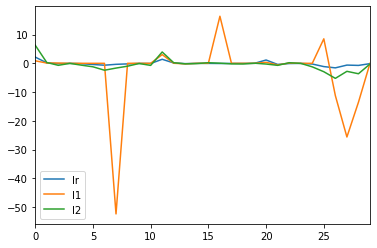

In [70]:
coefficients.plot(y=['lr', 'l1', 'l2'], kind='line')

**Predict on Test Set**

In [0]:
test_predictions = lr.predict(X_test)

In [72]:
test_predictions[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

###**Model Evaluation**

In [0]:
from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average = 'weighted'), 4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average = 'weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average = 'weighted'), 4))

**Evaluation Sets**

In [74]:
get_metrics(true_labels=y_test, predicted_labels=test_predictions)

Accuracy: 0.9649
Precision: 0.965
Recall: 0.9649
F1 Score: 0.9648


In [75]:
test_predictions = lr_l1.predict(X_test)
get_metrics(true_labels=y_test, predicted_labels=test_predictions)

Accuracy: 0.9708
Precision: 0.9709
Recall: 0.9708
F1 Score: 0.9708


In [76]:
test_predictions = lr_l2.predict(X_test)
get_metrics(true_labels=y_test, predicted_labels=test_predictions)

Accuracy: 0.9649
Precision: 0.9649
Recall: 0.9649
F1 Score: 0.9649


**Confusion Matrix**

In [85]:
total_classes = len(data.target_names)
level_labels = [total_classes*[0], list(range(total_classes))]
cm = metrics.confusion_matrix(y_true = y_test, y_pred = test_predictions, labels=[0,1])
cm_frame = pd.DataFrame(data=cm, 
                        columns=pd.MultiIndex(levels=[['Predicted:'], [0,1]], 
                                              codes=level_labels), 
                        index=pd.MultiIndex(levels=[['Actual:'], [0,1]], 
                                            codes=level_labels)) 
cm_frame

Predicted:     
                   0    1
Actual: 0         60    3
        1          3  105

In [86]:
print(metrics.classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### **Feature Selection**

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data2 = df.copy()
data_new = pd.DataFrame(sel.fit_transform(data2.loc[:,~data2.columns.isin(['has cancer'])]))

# train-test split
X_new,X_test_new, Y_new,Y_test_new = train_test_split(data_new, data2['has cancer'].tolist(), test_size=0.3, random_state=42)
print('Training dataset shape:', X_new.shape, '\tTest dataset shape:', X_test_new.shape)

Training dataset shape: (398, 11) 	Test dataset shape: (171, 11)
